# Lab 7 & 8

Saransh Kacharia
<br>
December 13th, 2020

## Higgs Classification Background

In this project we are going to look at an inclusive search for the standard model Higgs boson in pp collisions at $\sqrt{s} = 13$ TeV at the LHC using simulated data. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters. Due to large QCD backgorund containmination, the direct 5-sigma observation of this Higgs channel is not accomplished yet. We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data.



## Event Selection Optimization

This is the event selection optimization for the low-pT samples. The optimal event selections will be applied to selected pseudo-experiment data.

In [7]:
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from scipy import stats

In [8]:
plt.rcParams["figure.figsize"] = (8,8)

In [9]:
infile_qcd = open("qcd_100000_pt_250_500.pkl", 'rb')
qcdData = pickle.load(infile_qcd)

infile_higgs = open("higgs_100000_pt_250_500.pkl", 'rb')
higgsData = pickle.load(infile_higgs)

features = [key for key in qcdData.keys()]
print(features)

['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']


## Problem 1

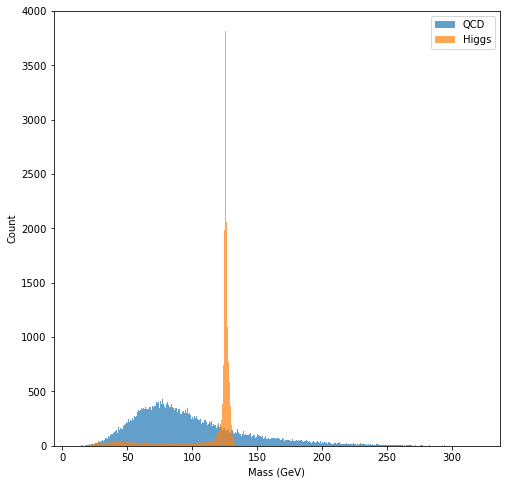

In [10]:
qcd_hist = plt.hist(qcdData.mass, bins=1000, label='QCD', alpha=0.7)
higgs_hist = plt.hist(higgsData.mass, bins=1000, label='Higgs', alpha=0.7)
plt.ylabel('Count')
plt.xlabel('Mass (GeV)')
plt.ylim(0,4000)
plt.legend()
plt.show()


This is a histogram of the QCD jet mass (blue) and the Higgs jet mass (orange).

Now we can find the significance of the Higgs without any event selection

In [11]:
exp_higgs = 100
exp_qcd = 20000
exp_tot = exp_qcd + exp_higgs

theoretical_sig = abs(stats.norm.ppf(1-stats.poisson.cdf(exp_tot, exp_qcd)))
print(f'Theoretical Significance: {theoretical_sig}')

observed_sig = exp_higgs/math.sqrt(exp_qcd)
print(f'Observed Significance: {observed_sig}')

Theoretical Significance: 0.7112259282313185
Observed Significance: 0.7071067811865475


The observed significane is $\frac{N_{\text{Higgs}}}{\sqrt{N_{\text{QCD}}}} = 0.7071$ which is $0.005$ away from the theoretical value of $0.7112$

## Problem 2

In [12]:

def cut(a,b,higgs,qcd):
    if b<=a:
        return 0, 0, 0, 0, 0
    higgs_cut = higgsData[higgs>a]
    higgs_cut = higgs_cut[higgs<b]

    qcd_cut = qcdData[qcd>a]
    qcd_cut = qcd_cut[qcd<b]

    higgs_n = 100*len(higgs_cut)/len(higgs)
    qcd_n = 20000*len(qcd_cut)/len(qcd)
    
    sig = abs(stats.norm.ppf(1-stats.poisson.cdf(higgs_n+qcd_n,qcd_n)))
    return higgs_cut, qcd_cut, sig, a, b

def findBest(higgs, qcd, start, stop, step):
    highestSig = higsCutt = qcdCutt = mass = aa = bb = 0
    for i in np.arange(start,stop, step):
        for j in np.arange(start,stop, step):
            higgs_cut, qcd_cut, sig, a, b = cut(i,j,higgs,qcd)
            if sig > highestSig:
                higsCutt = higgs_cut
                qcdCutt = qcd_cut
                highestSig = sig
                aa = a
                bb = b
    print(f"Best Significance Range {aa}-{bb} with Significance: {highestSig}")   
    return higsCutt, qcdCutt

def plotAll(qcd_Data, higgs_Data):
    fig, ax_arr = plt.subplots(len(qcd_Data.keys()),1, figsize=(15,50))
    index = 0
    for key in qcd_Data.keys():
        ax_arr[index].hist(qcd_Data.get(key), bins=100, density=True, alpha=0.7, label='qcd')
        ax_arr[index].title.set_text(key)
        ax_arr[index].hist(higgs_Data.get(key), bins=100, density=True, alpha=0.7, label='Higgs')
        ax_arr[index].title.set_text(key)
        ax_arr[index].legend()
        index += 1

In [13]:
higgsCut, qcdCut = findBest(higgsData.mass, qcdData.mass, 120, 135, 1)

Best Significance Range 124-128 with Significance: 3.0337389952368543


## Problem 3

After we have the best mass cut we can plot the rest of the features to see if they ahve good significance using the cut.

Here are plots without the cut. And below these are plots with the cut.

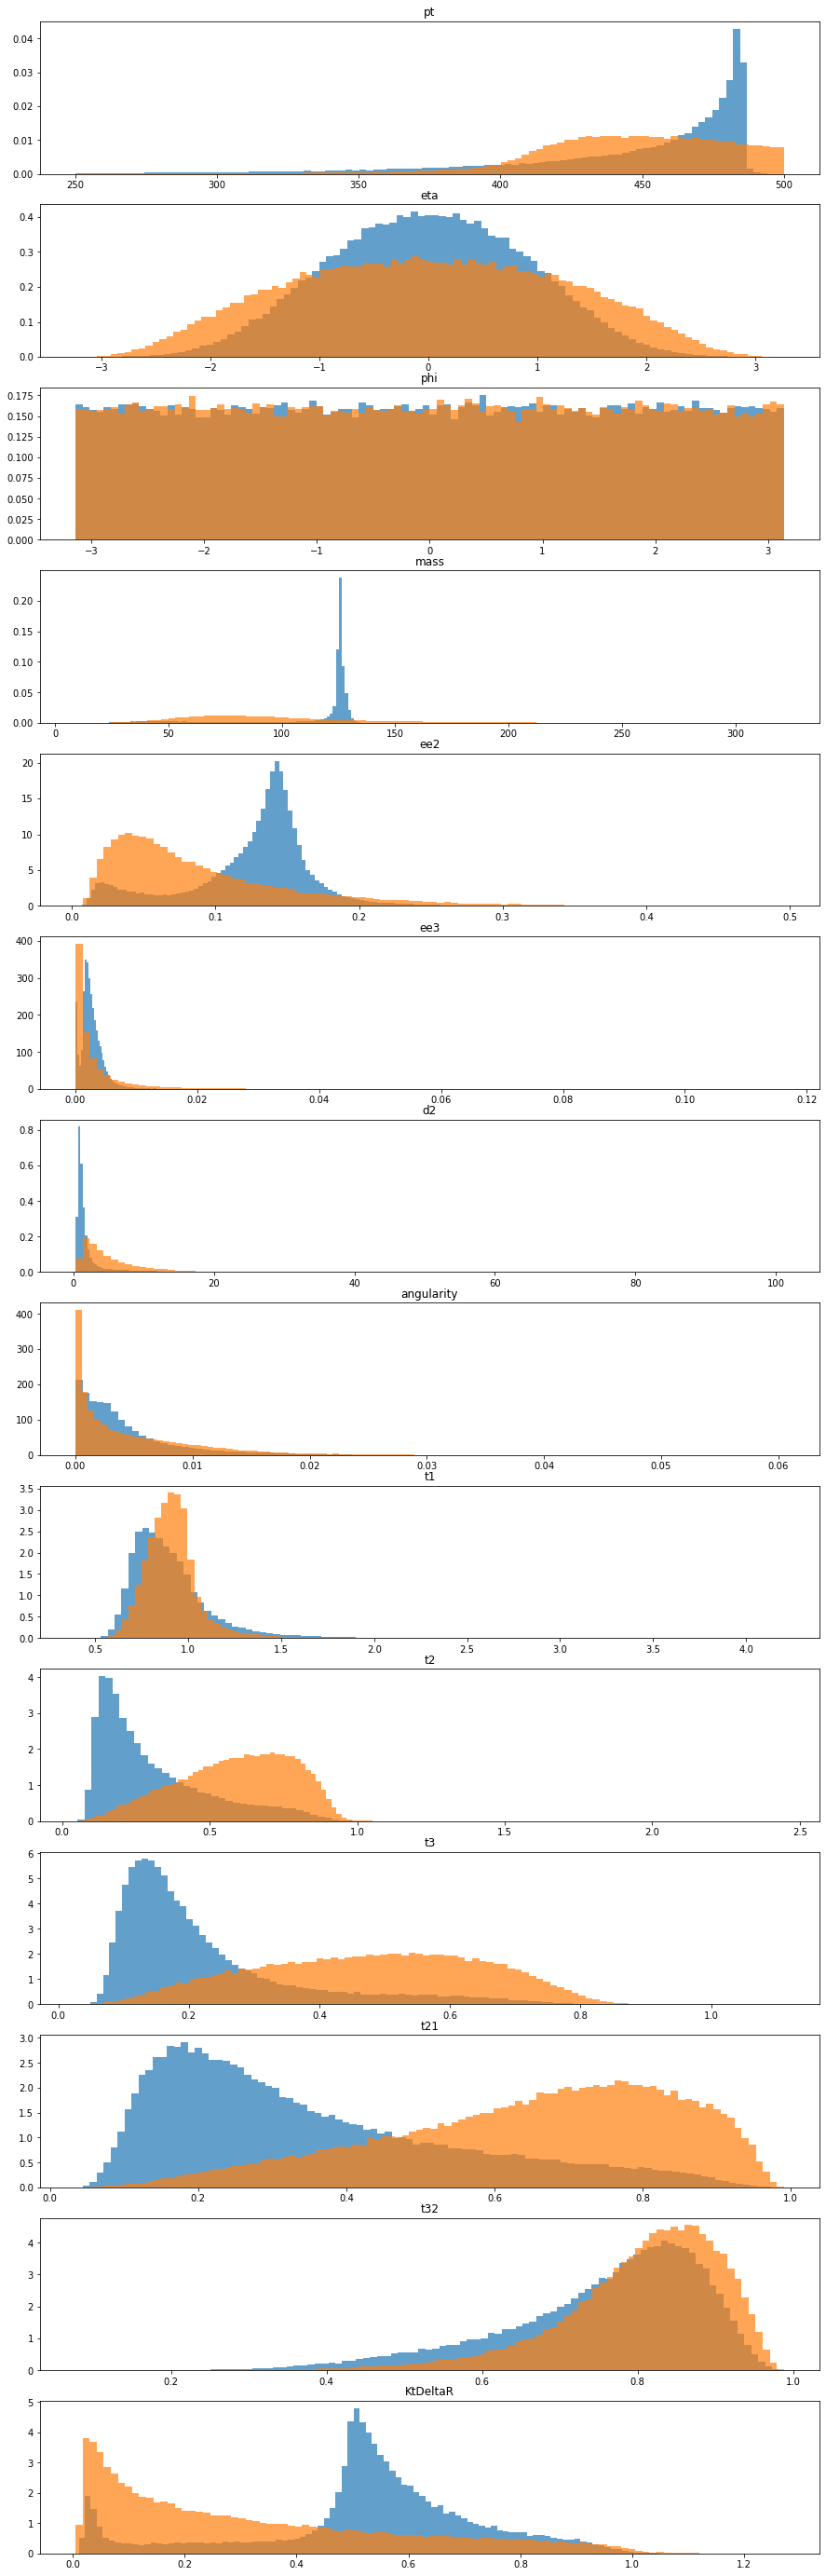

In [14]:
plotAll(higgsData, qcdData)

Below are the plots with the optimal cut from 124-128

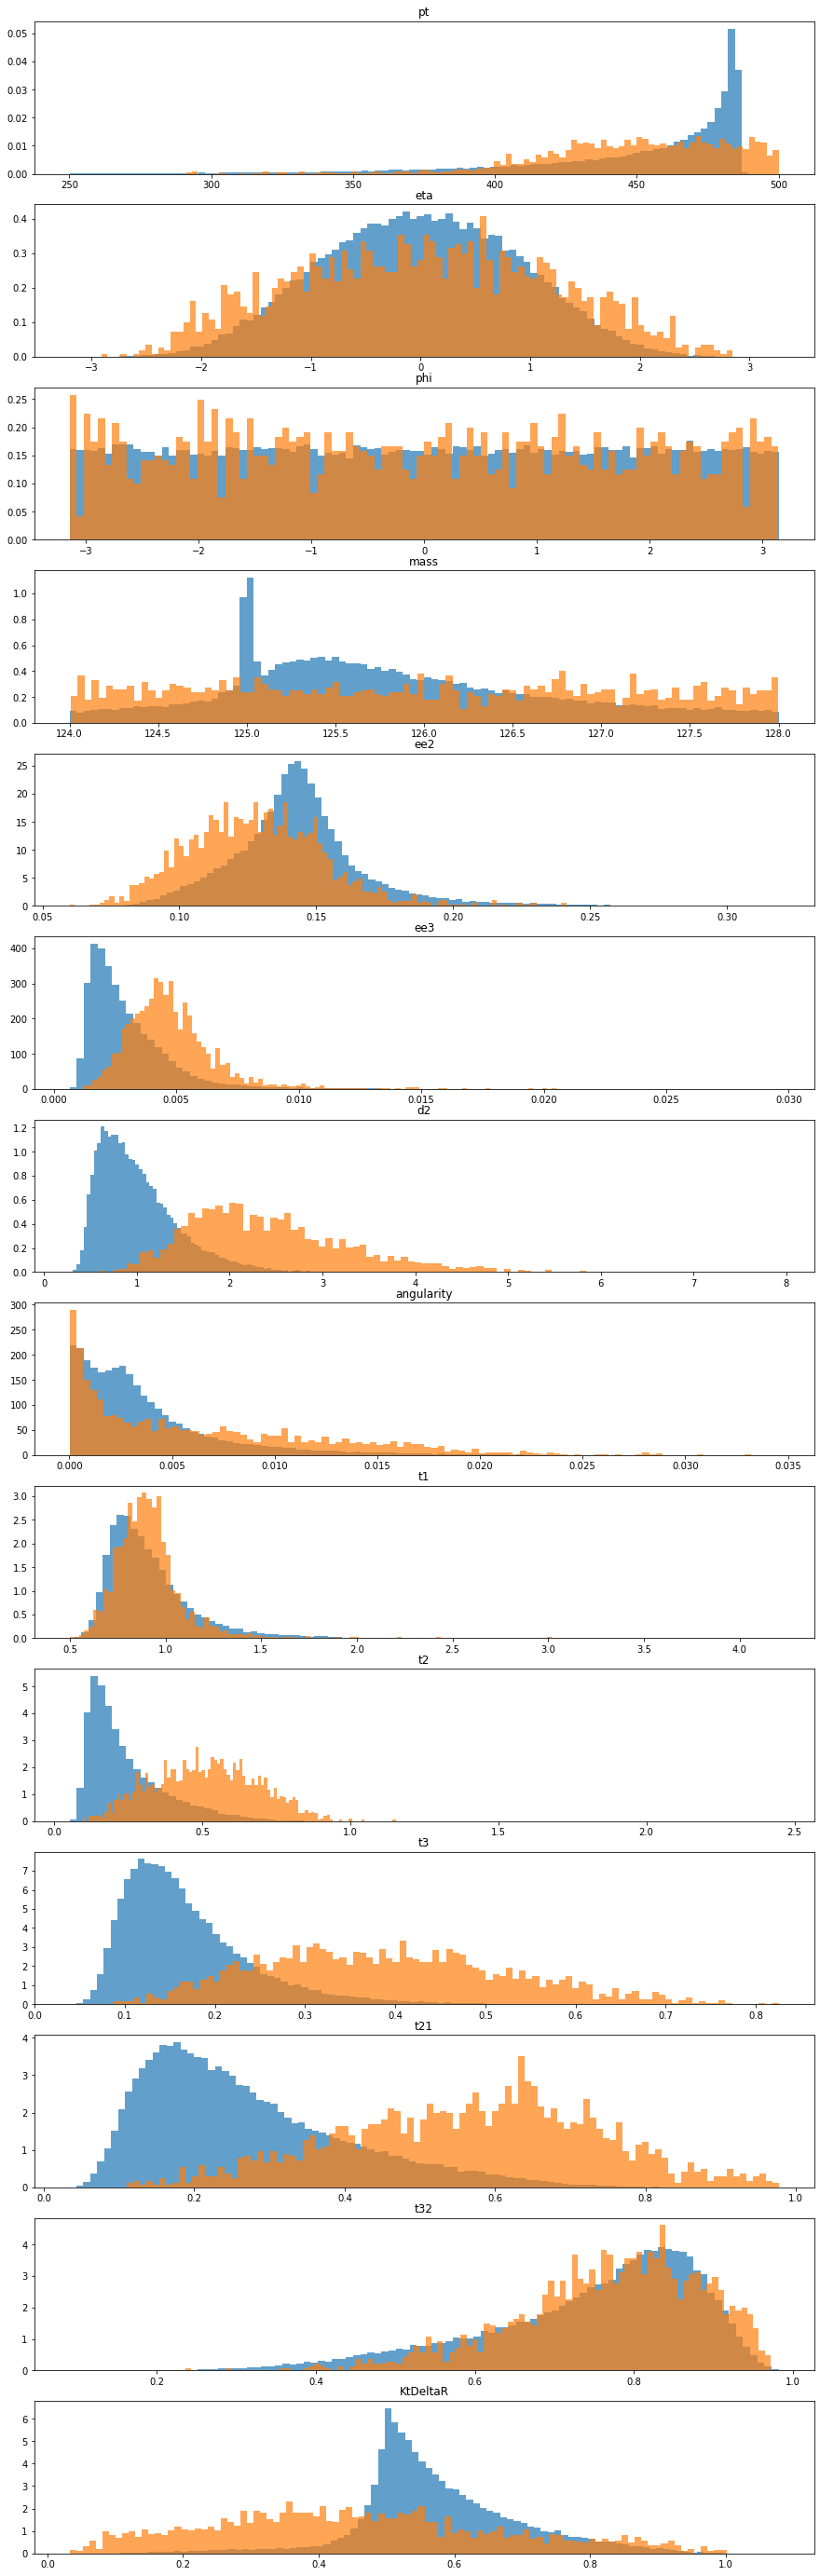

In [15]:
plotAll(higgsCut, qcdCut)

## Problem 4

Best cut for KRDeltaR

In [16]:
_, _ = findBest(higgsData.KtDeltaR, qcdData.KtDeltaR, 0, 1, 0.1)

Best Significance Range 0.4-0.9 with Significance: 1.0288832056806756


Best cut for t2

In [17]:
_, _ = findBest(higgsData.t2, qcdData.t2, 0, 1, 0.1)

Best Significance Range 0.0-0.2 with Significance: 1.6440995306272277


Best cut for d2

In [18]:
_, _ = findBest(higgsData.d2, qcdData.d2, 0, 20, 1)

Best Significance Range 0-1 with Significance: 1.6529252741678133


To improve our cut, we can cut on both mass and d2 and then calculate significance from d2.

## Pseudo-experimental Data Analysys

## Problem 1: High Luminosity Data

In [4]:
import pandas as pd

In [5]:
# high luminosity
high = pd.read_hdf('data_highLumi_pt_250_500.h5')
print(f'Total experiment events: {len(high.mass)}')

Total experiment events: 40344


In [19]:
N_higgs = len(high.mass)/len(higgsData.mass)*exp_higgs
N_qcd = len(high.mass)/len(qcdData.mass)*exp_qcd
print(f'N_Higgs scaled: {N_higgs:.0f}')
print(f'N_QCD scaled: {N_qcd:.0f}')

N_Higgs scaled: 40
N_QCD scaled: 8069


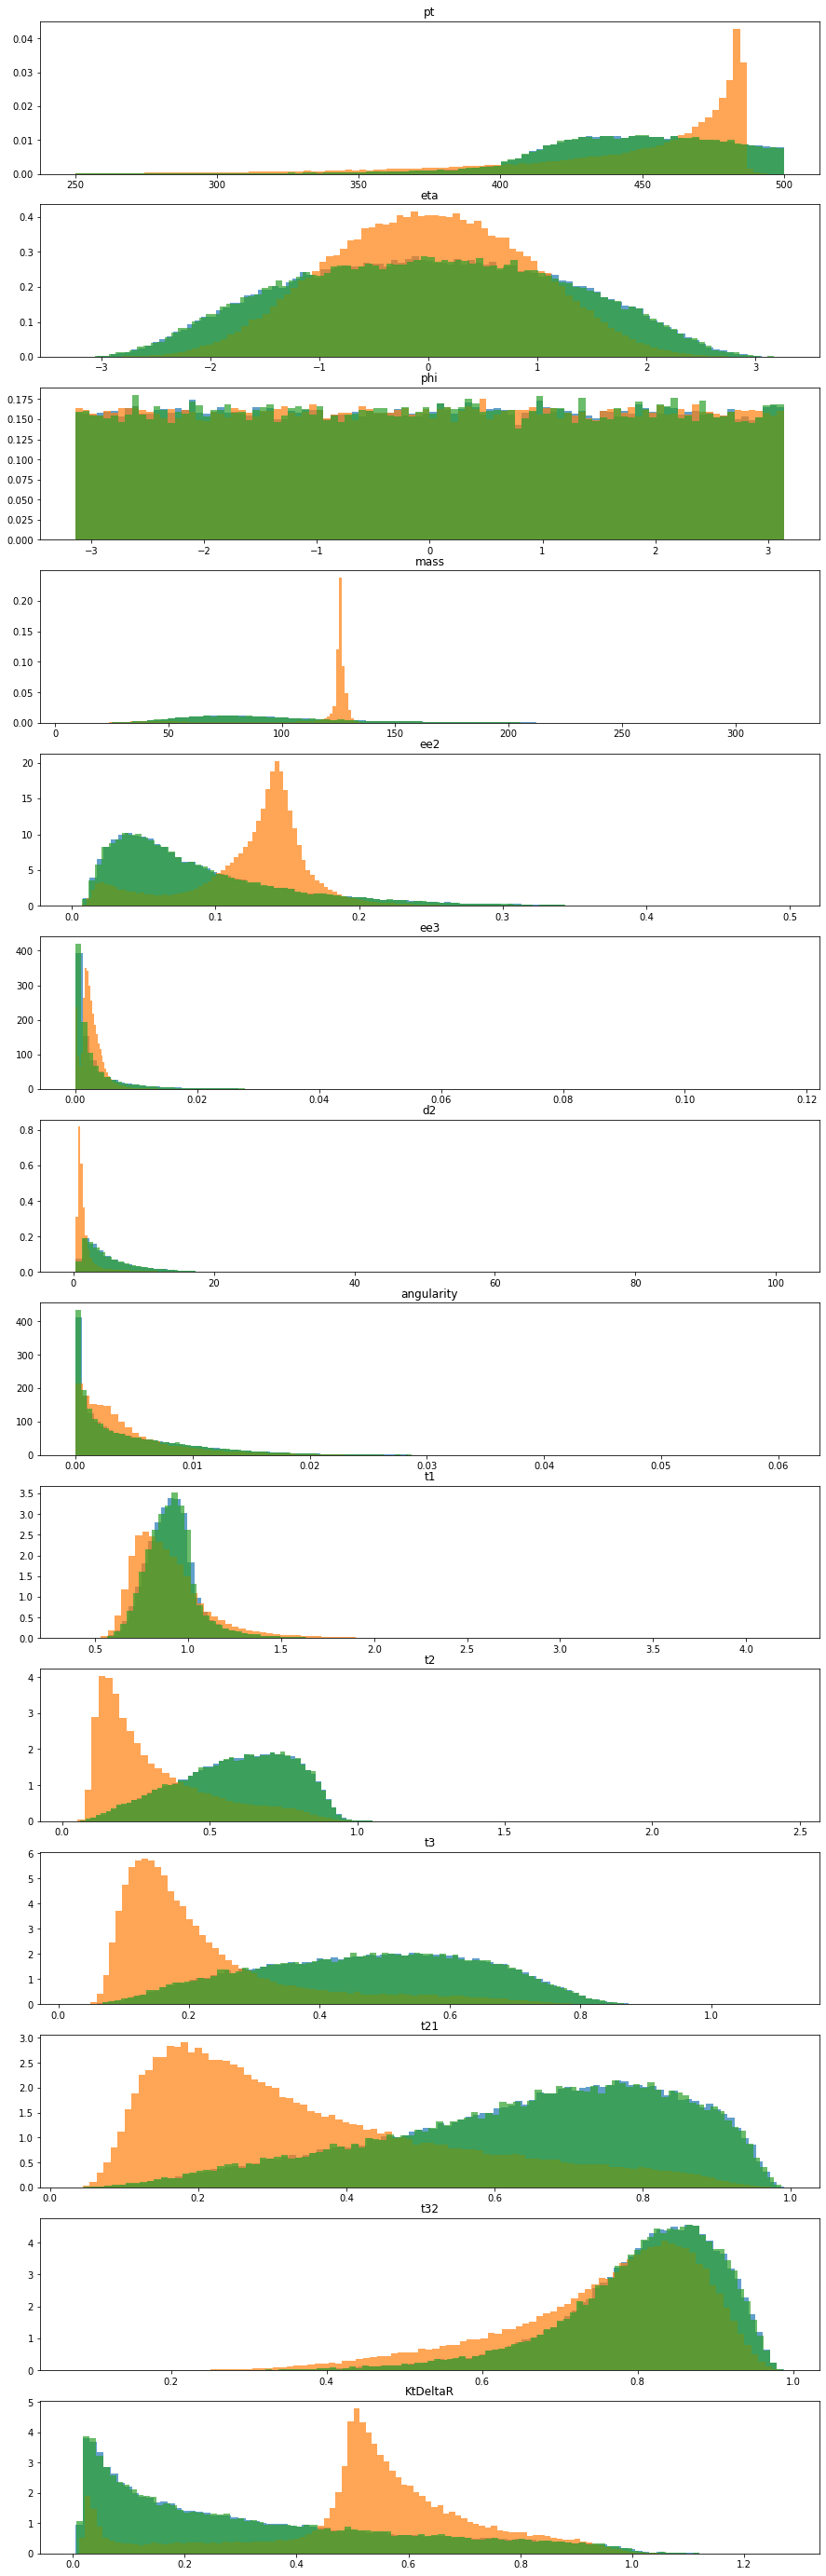

In [22]:
fig, ax_arr = plt.subplots(len(qcdData.keys()),1, figsize=(15,50))
index = 0
for key in qcdData.keys():
    ax_arr[index].hist(qcdData.get(key), bins=100, density=True, alpha=0.7, label='QCD')
    ax_arr[index].title.set_text(key)
    ax_arr[index].hist(higgsData.get(key), bins=100, density=True, alpha=0.7, label='Higgs')
    ax_arr[index].hist(high.get(key), bins=100, density=True, alpha = 0.7, label='High Luminosity Data')
    ax_arr[index].title.set_text(key)
    ax_arr[index].legend()
    index += 1

In [24]:
highCut = high[high.mass>124]
highCut = highCut[high.mass<128]

N_qcd = len(qcdCut)/100000*2000

high_events = len(highCut)

print(f'Selected experiment events: {high_events:.0f}')
print(f'N_QCD in best cut range: {N_qcd:.0f}')
obs_significance = stats.norm.isf(stats.poisson.sf(high_events, N_qcd))
print(f'Observed significance: {obs_significance:.2f}')

Selected experiment events: 919
N_QCD in best cut range: 38
Observed significance: inf


Here we see a sigma significance of inf. This is because the cut of the background is too small.

With the optimal cut, this is what the histograms look like.

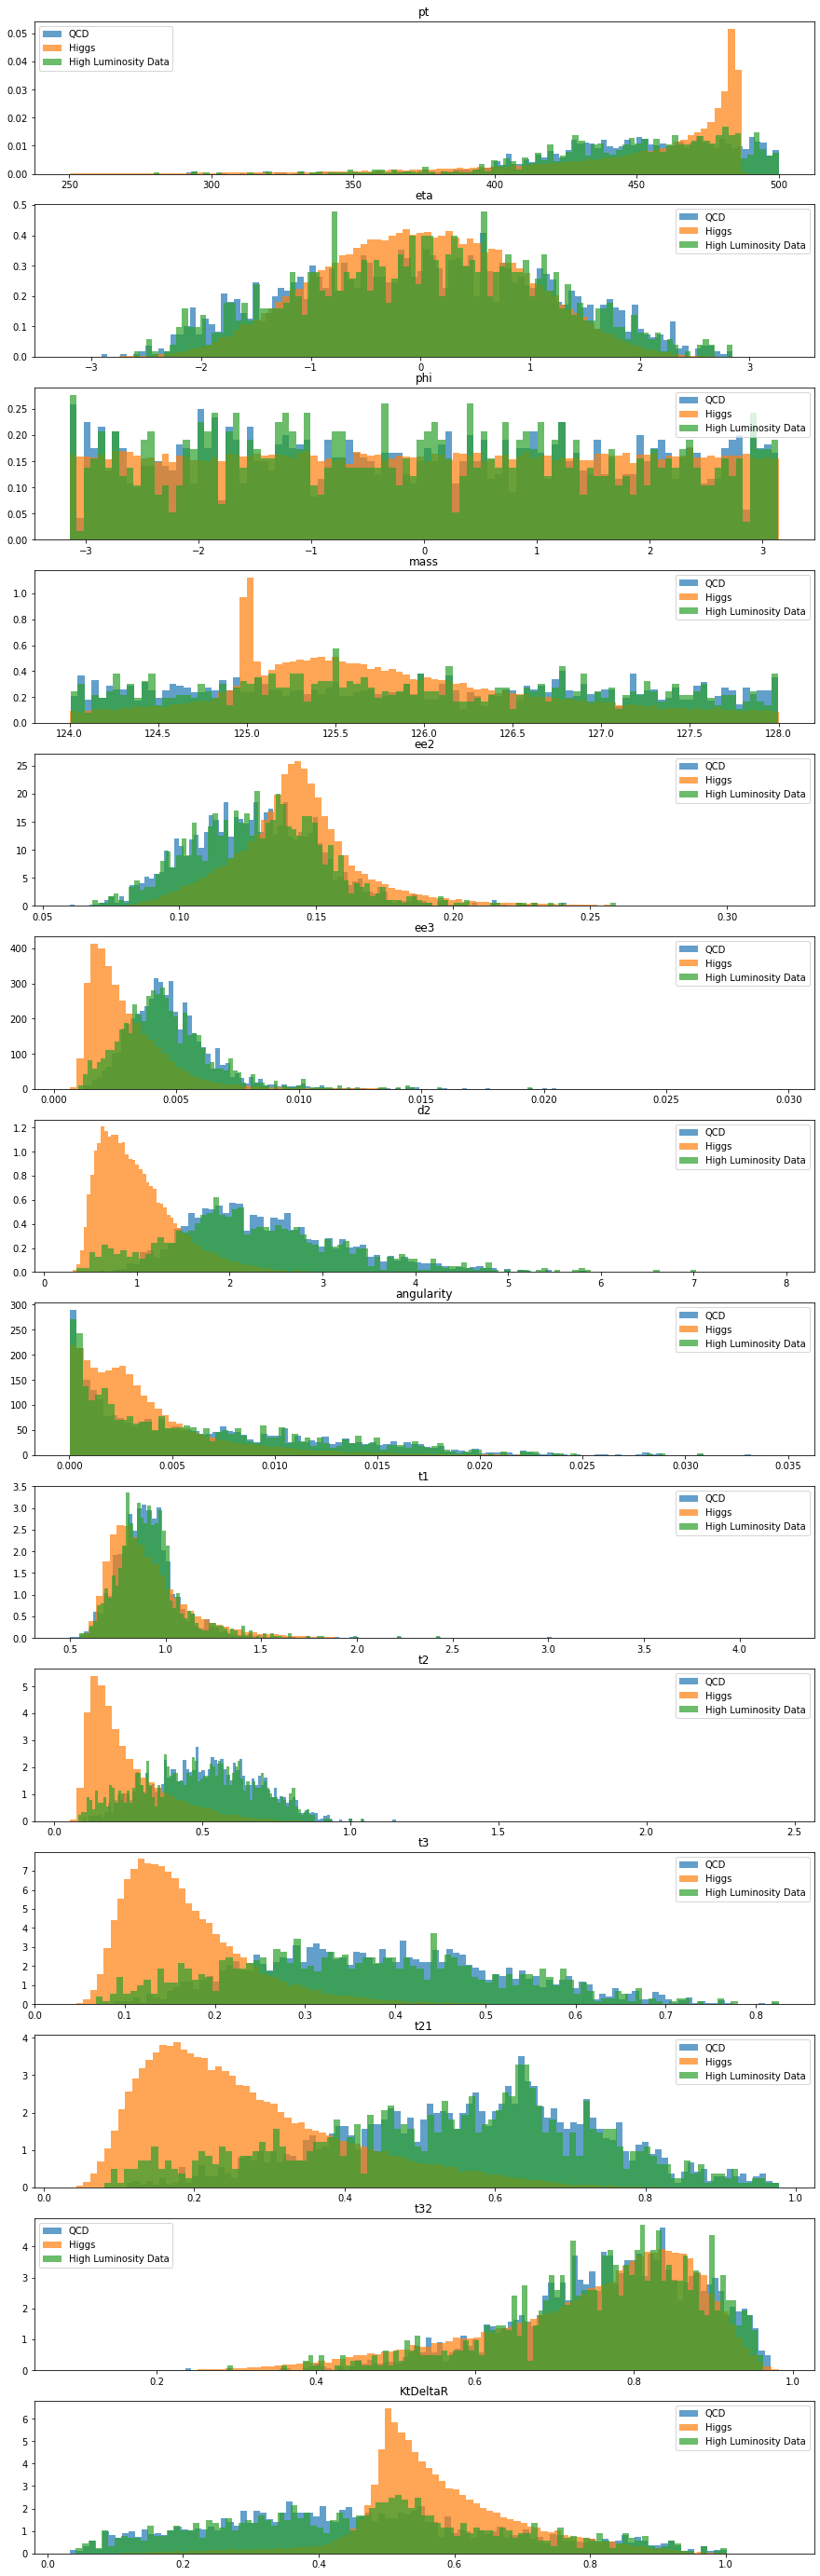

In [25]:
fig, ax_arr = plt.subplots(len(qcdData.keys()),1, figsize=(15,50))
index = 0
for key in qcdData.keys():
    ax_arr[index].hist(qcdCut.get(key), bins=100, density=True, alpha=0.7, label='QCD')
    ax_arr[index].title.set_text(key)
    ax_arr[index].hist(higgsCut.get(key), bins=100, density=True, alpha=0.7, label='Higgs')
    ax_arr[index].hist(highCut.get(key), bins=100, density=True, alpha = 0.7, label='High Luminosity Data')
    ax_arr[index].title.set_text(key)
    ax_arr[index].legend()
    index += 1

## Problem 2: Low Luminosity Data

In [27]:
low = pd.read_hdf('data_lowLumi_pt_250_500.h5')
print(f'Total experiment events: {len(low.mass)}')

Total experiment events: 4060


In [28]:
N_higgs = len(low.mass)/len(higgsData.mass)*exp_higgs
N_qcd = len(low.mass)/len(qcdData.mass)*exp_qcd
print(f'N_Higgs scaled: {N_higgs:.0f}')
print(f'N_QCD scaled: {N_qcd:.0f}')

N_Higgs scaled: 4
N_QCD scaled: 812


Plots without event selection

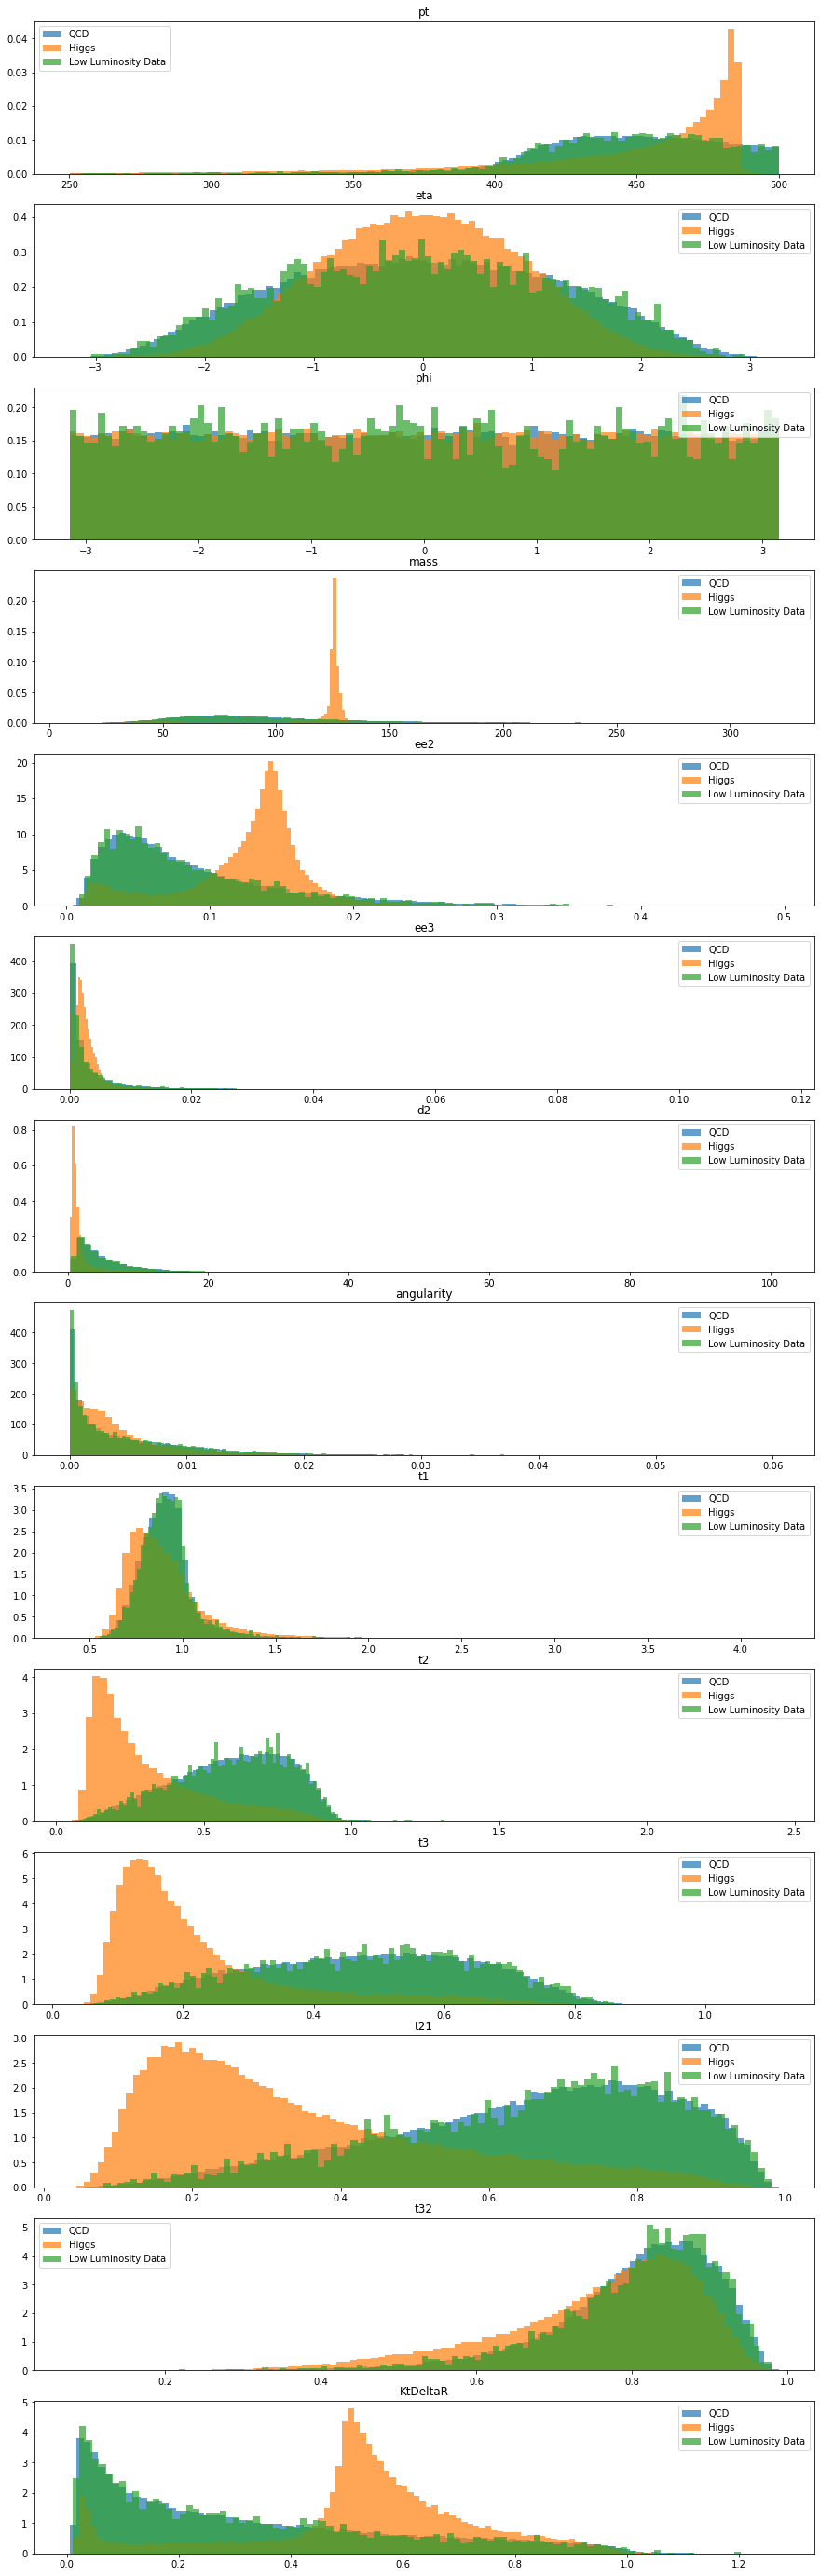

In [29]:
fig, ax_arr = plt.subplots(len(qcdData.keys()),1, figsize=(15,50))
index = 0
for key in qcdData.keys():
    ax_arr[index].hist(qcdData.get(key), bins=100, density=True, alpha=0.7, label='QCD')
    ax_arr[index].title.set_text(key)
    ax_arr[index].hist(higgsData.get(key), bins=100, density=True, alpha=0.7, label='Higgs')
    ax_arr[index].hist(low.get(key), bins=100, density=True, alpha = 0.7, label='Low Luminosity Data')
    ax_arr[index].title.set_text(key)
    ax_arr[index].legend()
    index += 1

In [30]:
lowCut = low[low.mass>124]
lowCut = lowCut[low.mass<128]

N_qcd = len(qcdCut)/100000*2000

low_events = len(lowCut)

print(f'Selected experiment events: {low_events:.0f}')
print(f'N_QCD in best cut range: {N_qcd:.0f}')
obs_significance = stats.norm.isf(stats.poisson.sf(low_events, N_qcd))
print(f'Observed significance: {obs_significance:.2f}')

Selected experiment events: 97
N_QCD in best cut range: 38
Observed significance: 8.01


Plots with event selection

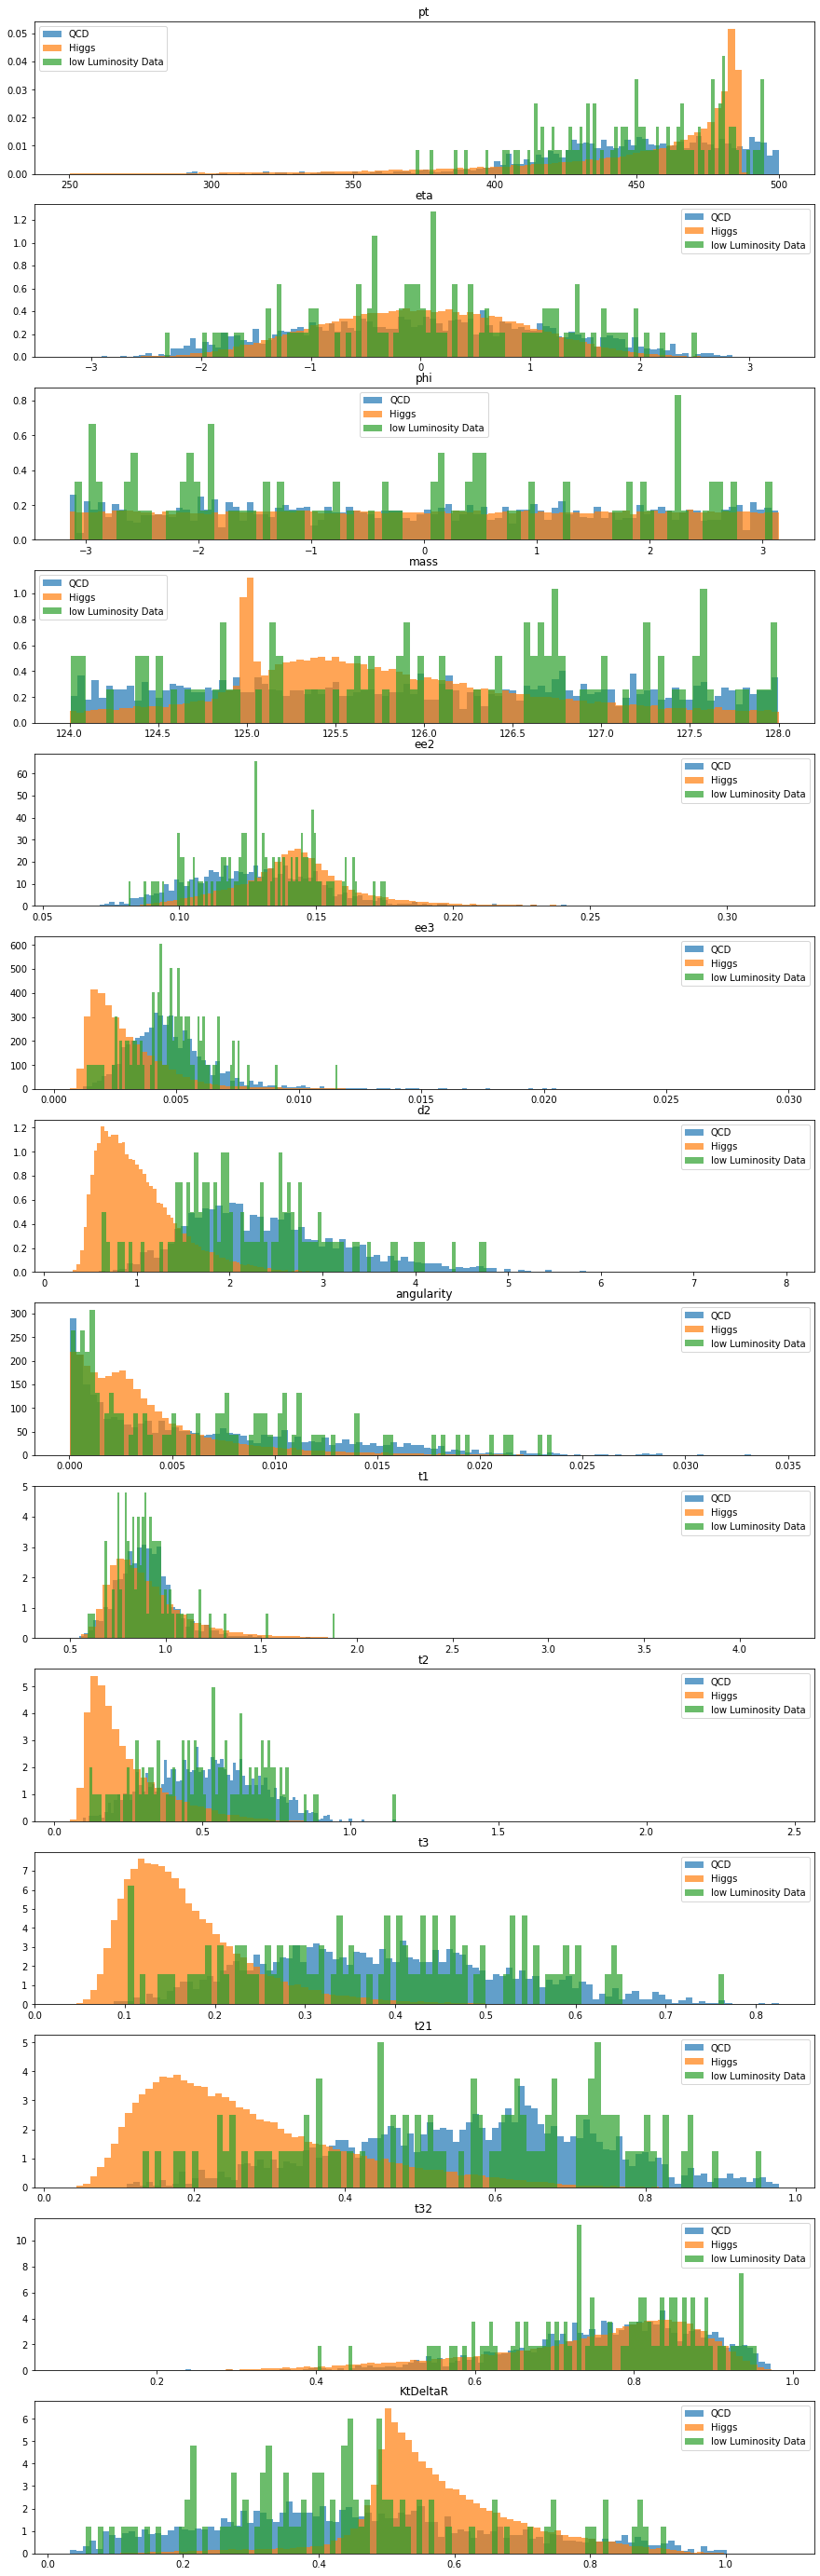

In [31]:
fig, ax_arr = plt.subplots(len(qcdData.keys()),1, figsize=(15,50))
index = 0
for key in qcdData.keys():
    ax_arr[index].hist(qcdCut.get(key), bins=100, density=True, alpha=0.7, label='QCD')
    ax_arr[index].title.set_text(key)
    ax_arr[index].hist(higgsCut.get(key), bins=100, density=True, alpha=0.7, label='Higgs')
    ax_arr[index].hist(lowCut.get(key), bins=100, density=True, alpha = 0.7, label='low Luminosity Data')
    ax_arr[index].title.set_text(key)
    ax_arr[index].legend()
    index += 1

In [34]:
N_higgs = 100*len(higgsCut.mass)/100000
N_qcd = 2000*len(qcdCut)/100000
expected_sig = N_higgs / math.sqrt(N_qcd)
upper_sig = (N_higgs + 2*math.sqrt(N_qcd))/math.sqrt(N_qcd)
lower_sig = (N_higgs - 2*math.sqrt(N_qcd))/math.sqrt(N_qcd)
print(f"Expected:  {expected_sig:.2f}")
print(f"Expected 95% condicence level upper limit:  {upper_sig:.2f}")
print(f"Expected 95% condicence level lower limit:  {lower_sig:.2f}")

Expected:  9.76
Expected 95% condicence level upper limit:  11.76
Expected 95% condicence level lower limit:  7.76


The result I got were expected, the 95% upper limit is the chance that the signal will be within that confidence level 95% of the time. Vica versa is true for the lower limit confidence levels.